# Project 1
# Name Of The Project : Churn Prediction in Telecom Industry using Logistic Regression 


* Name : Aravalam Rajasekhar
* gmail : rasekhar6@gmail.com
* phone no : 9849692369
* Course : B.Tech (Final Year)
* College : SVU COLLEGE OF ENGINEERING (TIRUPATI)

# Problem Statement :     

According to European Business Review, telecommunication providers lose close to $65 million a month from customer churn. Isn't that 
expensive? With many emerging telecom giants, the competition in the telecom sector is increasing and the chances of customers discontinuing a 
service are high. This is often referred to as Customer Churn in Telecom. 
Telecommunication providers that focus on quality service, lower-cost 
subscription plans, availability of content and features whilst creating positive 
customer service experiences have high chances of customer retention. The 
good news is that all these factors can be measured with different layers of 
data about billing history, subscription plans, 
plans, cost of content, network/bandwidth utilization, and more to get a 360-degree view of the 
customer. This 360-degree view of customer data can be leveraged for predictive analytics to identify patterns and various trends that influence 
customer satisfaction and help reduce churn in telecom. 


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Loading Datasets

In [2]:
internet_data=pd.read_csv('/content/sample_data/internet_data.csv')
customer_data=pd.read_csv('/content/sample_data/customer_data.csv')
churn_data=pd.read_csv('/content/sample_data/churn_data.csv')

# Displaying 3 datasets

In [3]:
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [4]:
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Merging of 3 datasets which having customer_ID column in common

In [6]:
merged_data=customer_data
merged_data[internet_data.columns[1:]]=internet_data[internet_data.columns[1:]]
merged_data[churn_data.columns[1:]]=churn_data[churn_data.columns[1:]]

# Displaying the merged dataset

In [7]:
merged_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,...,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,...,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Visualisation & analysis of various categorical features of churn cases

In [8]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  tenure            7043 non-null   int64  
 14  PhoneService      7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Dataset info

* The dataset consists of **21 columns & 7043 rows** without any null values
* The column names are customerID,gender,SeniorCitizen,Partner,Dependents,  MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,         PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn        
* The target variable is **Churn**    


# Column Info

* customerID - ID Number of the customer
* gender     - gender of the customer
* SeniorCitizen - Tells whether customer is senior or not
* Partner   -  Tells whether the customer is having partner or not in boolean form
* Dependents - Tells whether the customer is having dependents or not
* MultipleLines - describes about multiple lines the customer having
* InternetService - describes the Internet service type
* OnlineSecurity - tells whether OnlineSecurity is provided or not
* OnlineBackup - tells whether OnlineBackup is having or not
* DeviceProtection - tells whether device is protected or not
* TechSupport - tells whether customer is seeking tech support or not
* StreamingTV - tells whether subscribed for TV Streaming or not
* MovieStreaming - tells whether subscribed for Movie streaming or not
* tenure - describes the activation period of subscription
* PhoneService - tells whether the customer subscribed Phone Service or not
* Contract - It tells about contract type of the service whether it Month-to-Month contract or one year contract
* PaperlessBilling - tells whether billing is paperless or not
* PaymentMethod - describes about mode of the Payment
* MonthlyCharges - Monthly amount paid by each customer
* TotalCharges - Total amount paid by each customer since from taking new connection to present
* Churn - Tells whether the customer affecting to Churn or not.It is the target variable.

In [9]:
merged_data['customerID'].value_counts()

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

# Removal of customerID column because of different ID  values

In [10]:
merged_data.drop('customerID',axis=1,inplace=True)

# Data Visualisation & analysis of churn cases

Text(0.5, 1.0, 'Visualisation of Churn cases')

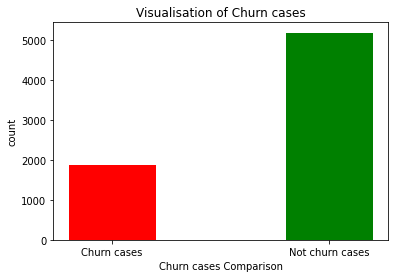

In [11]:
plt.bar(['Churn cases','Not churn cases'],[len(merged_data[merged_data['Churn']=='Yes']),len(merged_data[merged_data['Churn']=='No'])],color=['red','green'],width=0.4)
plt.xlabel('Churn cases Comparison')
plt.ylabel('count')
plt.title('Visualisation of Churn cases')                                       

# Visualisation & analysis of various categorical features of churn cases

In [12]:
cat_feat=['gender','SeniorCitizen','Partner','Dependents','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PhoneService','Contract','PaperlessBilling','PaymentMethod']

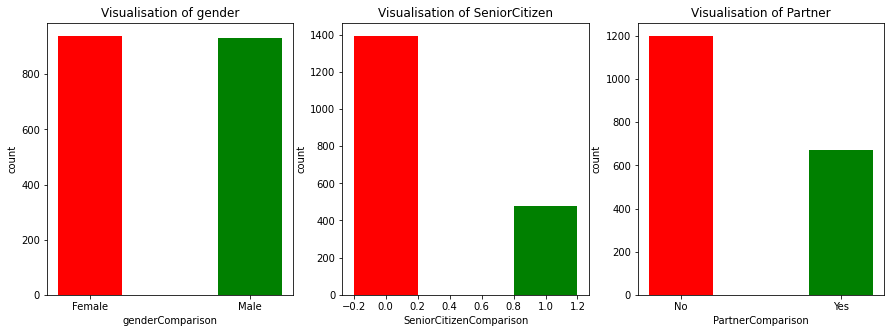

In [13]:
plt.figure(figsize=(15,5))
for i in range(1,len(cat_feat[:3])+1):
    plt.subplot(1,3,i)
    plt.bar(merged_data[merged_data['Churn']=='Yes'][cat_feat[i-1]].value_counts().index,merged_data[merged_data['Churn']=='Yes'][cat_feat[i-1]].value_counts().values,color=['red','green'],width=0.4)
    plt.xlabel(cat_feat[i-1]+'Comparison')
    plt.ylabel('count')
    plt.title('Visualisation of '+cat_feat[i-1])
    
    

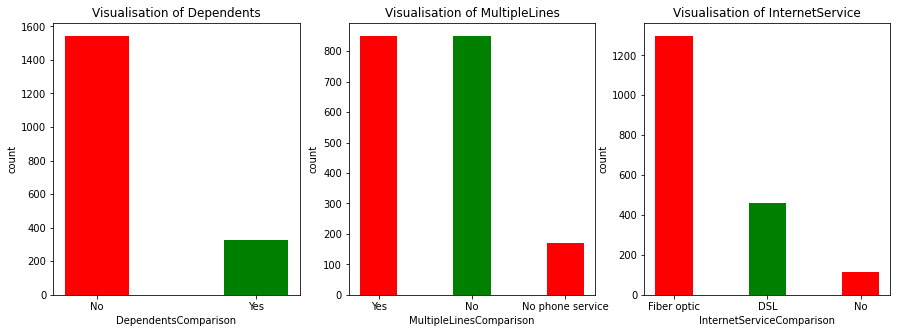

In [14]:
plt.figure(figsize=(15,5))
for i in range(1,len(cat_feat[3:6])+1):
    plt.subplot(1,3,i)
    plt.bar(merged_data[merged_data['Churn']=='Yes'][cat_feat[3+i-1]].value_counts().index,merged_data[merged_data['Churn']=='Yes'][cat_feat[3+i-1]].value_counts().values,color=['red','green'],width=0.4)
    plt.xlabel(cat_feat[3+i-1]+'Comparison')
    plt.ylabel('count')
    plt.title('Visualisation of '+cat_feat[3+i-1])
    

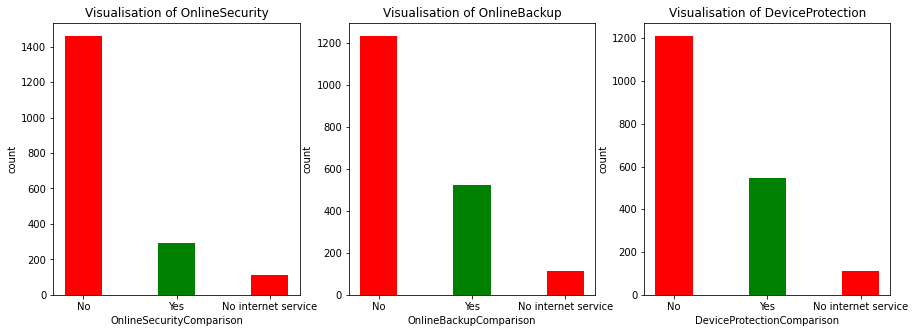

In [15]:
plt.figure(figsize=(15,5))
for i in range(1,len(cat_feat[6:9])+1):
    plt.subplot(1,3,i)
    plt.bar(merged_data[merged_data['Churn']=='Yes'][cat_feat[6+i-1]].value_counts().index,merged_data[merged_data['Churn']=='Yes'][cat_feat[6+i-1]].value_counts().values,color=['red','green'],width=0.4)
    plt.xlabel(cat_feat[6+i-1]+'Comparison')
    plt.ylabel('count')
    plt.title('Visualisation of '+cat_feat[6+i-1])

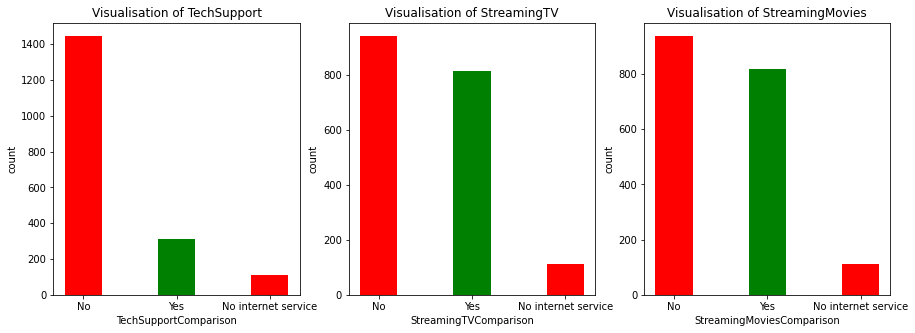

In [16]:
plt.figure(figsize=(15,5))
for i in range(1,len(cat_feat[9:12])+1):
    plt.subplot(1,3,i)
    plt.bar(merged_data[merged_data['Churn']=='Yes'][cat_feat[9+i-1]].value_counts().index,merged_data[merged_data['Churn']=='Yes'][cat_feat[9+i-1]].value_counts().values,color=['red','green'],width=0.4)
    plt.xlabel(cat_feat[9+i-1]+'Comparison')
    plt.ylabel('count')
    plt.title('Visualisation of '+cat_feat[9+i-1])

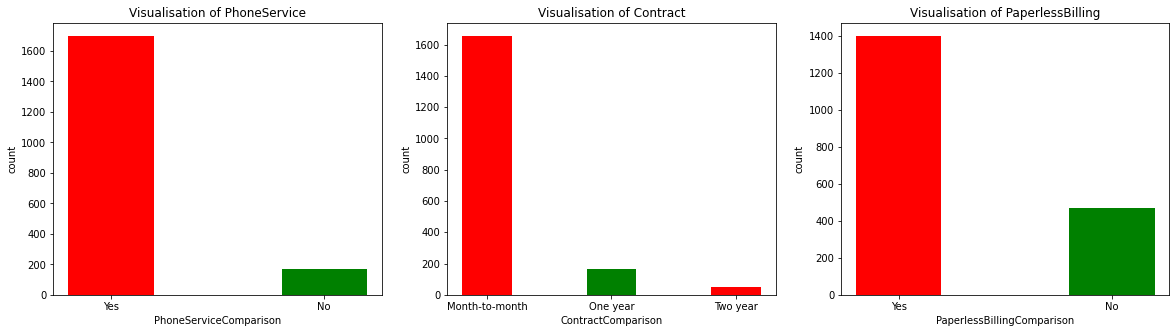

In [17]:
plt.figure(figsize=(20,5))
for i in range(1,len(cat_feat[12:15])+1):
    plt.subplot(1,3,i)
    plt.bar(merged_data[merged_data['Churn']=='Yes'][cat_feat[12+i-1]].value_counts().index,merged_data[merged_data['Churn']=='Yes'][cat_feat[12+i-1]].value_counts().values,color=['red','green'],width=0.4)
    plt.xlabel(cat_feat[12+i-1]+'Comparison')
    plt.ylabel('count')
    plt.title('Visualisation of '+cat_feat[12+i-1])

# Observation :

* Customers who are consuming InternetSevice through Fiber Optic are facing churn problems.
* Customers who are without Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies & PaperlessBilling are the main reason for churn

# Analysis of PaymentMethod through Bar Chart

Text(0.5, 1.0, 'Visualisation of PaymentMethod')

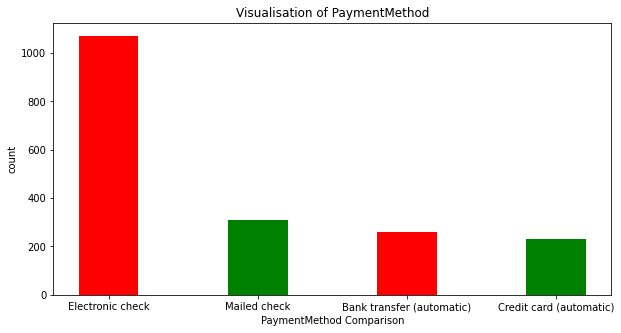

In [18]:
plt.figure(figsize=(10,5))
plt.bar(merged_data[merged_data['Churn']=='Yes']['PaymentMethod'].value_counts().index,merged_data[merged_data['Churn']=='Yes'][['PaymentMethod']].value_counts().values,color=['red','green'],width=0.4)
plt.xlabel('PaymentMethod Comparison')
plt.ylabel('count')
plt.title('Visualisation of PaymentMethod')

# Visualisation & analysis of various numerical features of churn cases

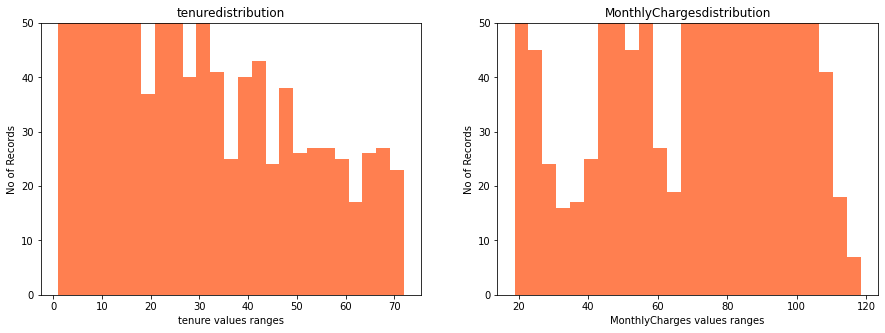

In [19]:
num_feat=['tenure','MonthlyCharges']
plt.figure(figsize=(15,5))
for i in range(1,len(num_feat)+1):
    plt.subplot(1,2,i)
    plt.hist(merged_data[merged_data['Churn']=='Yes'][num_feat[i-1]],bins=25,color='coral')
    plt.ylim(0,50)
    plt.xlabel(num_feat[i-1]+' values ranges')
    plt.ylabel('No of Records')
    plt.title(num_feat[i-1]+'distribution')

# Converting Categorical values into numerical values in merged dataset

In [20]:
def convert_gender(val):
    return 1 if val=='Male' else 0
def convert_partner(val):
    return 1 if val=='Yes' else 0
def convert_Dependent(val):
    return 1 if val=='Yes' else 0
def convert(val):
    return 1 if val=='Yes' else 0
merged_data['gender']=merged_data['gender'].apply(convert_gender)
merged_data['Partner']=merged_data['Partner'].apply(convert_partner)
merged_data['Dependents']=merged_data['Dependents'].apply(convert_Dependent)
cat_column=['PhoneService','PaperlessBilling','Churn']
for i in cat_column:
    merged_data[i]=merged_data[i].apply(convert)
count=len(merged_data['Contract'].value_counts())
dict={}
for i in merged_data['Contract'].value_counts().index:
    dict[i]=count
    count-=1
def convert_contract(val):
    return dict[val]
merged_data['Contract']=merged_data['Contract'].apply(convert_contract)
count=len(merged_data['PaymentMethod'].value_counts())
dict={}
for i in merged_data['PaymentMethod'].value_counts().index:
    dict[i]=count
    count-=1
def convert_paymentmethod(val):
    return dict[val]
merged_data['PaymentMethod']=merged_data['PaymentMethod'].apply(convert_paymentmethod)    
for i in merged_data.columns[1:]:
    print(merged_data[i].value_counts())
for i in merged_data.columns[1:]:
    count=len(merged_data[i].value_counts().index)
    dict={}
    for j in merged_data[i].value_counts().index:
        dict[j]=count
        count-=1
    def convert(val):return dict[val]
    merged_data[i]=merged_data[i].apply(convert)

0    5901
1    1142
Name: SeniorCitizen, dtype: int64
0    3641
1    3402
Name: Partner, dtype: int64
0    4933
1    2110
Name: Dependents, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64
No                     2785
Yes                    27

# merged_dataset after conversion of categorical values into numerical

In [21]:
merged_data.head()

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,2,1,2,1,2,3,2,3,3,3,3,73,1,3,2,4,534,5913,2
1,1,2,2,2,3,2,2,3,2,3,3,3,14,2,1,1,3,172,1161,2
2,1,2,2,2,3,2,2,2,3,3,3,3,71,2,3,2,3,974,2074,1
3,1,2,2,2,1,2,2,3,2,2,3,3,8,1,1,1,2,286,2075,2
4,0,2,2,2,3,3,3,3,3,3,3,3,71,2,3,2,4,1442,2076,1


# Checking outliers for numerical columns

In [22]:
num_feat,i,j,feat,total_feat=['tenure','MonthlyCharges'],0,0,[],[]
print('percentage of outliers in each numerical column')
while i<len(num_feat):
    q1=merged_data[num_feat[i]].quantile(.25)
    q3=merged_data[num_feat[i]].quantile(.75)
    iqr=q3-q1
    lower_limit=q1-1.5*iqr
    upper_limit=q3+1.5*iqr
    if merged_data[num_feat[i]][j]>upper_limit or merged_data[num_feat[i]][j]<lower_limit:
        feat.append(merged_data[num_feat[i]][j])
    j+=1
    if j==len(merged_data):
        j=0
        i+=1
        print(len(feat)/len(merged_data)*100,'%')
        total_feat.append(feat)
        feat=[]
    
    
    

percentage of outliers in each numerical column
0.0 %
0.7667187278148516 %


[(0.0, 100.0), Text(0.5, 1.0, 'tenure column boxplot')]

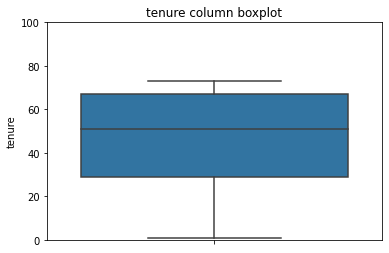

In [23]:

box=sns.boxplot(y=merged_data['tenure'])
box.set(title='tenure column boxplot',ylim=(0,100))

# MonthlyCharges have 0.7% of outliers.It should be replaced by mean value

In [24]:
x=[]
for i in merged_data['MonthlyCharges']:
    if i>upper_limit or i<lower_limit:
        x.append(merged_data['MonthlyCharges'].mean())
    else:
        x.append(i)
merged_data['MonthlyCharges']=x
    

In [25]:
corr=merged_data.corr()
corr

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,0.001874,0.001808,-0.010517,0.000485,-0.010380,0.003429,0.002032,-0.005092,-0.000985,-0.001156,0.000191,0.008054,-0.006488,-0.006171,-0.011754,0.005209,0.000776,0.004172,0.008612
SeniorCitizen,0.001874,1.000000,0.016479,-0.211185,0.099883,-0.259390,-0.210897,-0.152780,-0.157095,-0.223770,-0.130130,-0.120802,0.023529,-0.008576,-0.109299,-0.156530,-0.093704,0.061480,0.004759,0.150889
Partner,0.001808,0.016479,1.000000,0.452676,0.090981,0.000132,0.081850,0.087055,0.094451,0.069072,0.080127,0.075779,0.137077,-0.017706,0.216229,0.014877,0.133115,0.057937,0.079797,-0.150448
Dependents,-0.010517,-0.211185,0.452676,1.000000,-0.016875,0.179631,0.190523,0.162445,0.156439,0.180832,0.140395,0.125820,0.073993,0.001762,0.178429,0.111377,0.123844,-0.021390,0.034334,-0.164221
MultipleLines,0.000485,0.099883,0.090981,-0.016875,1.000000,-0.174989,-0.235021,-0.210372,-0.200463,-0.232155,-0.202414,-0.195815,0.086663,0.691070,0.040607,-0.108230,0.030659,0.313775,0.051278,0.019423
InternetService,-0.010380,-0.259390,0.000132,0.179631,-0.174989,1.000000,0.764943,0.686403,0.682448,0.760985,0.617704,0.620005,-0.024386,0.093720,0.203148,0.378108,0.178137,-0.299884,-0.063668,-0.316846
OnlineSecurity,0.003429,-0.210897,0.081850,0.190523,-0.235021,0.764943,1.000000,0.751661,0.749040,0.791225,0.701976,0.704984,0.021288,-0.125353,0.275864,0.334003,0.213800,-0.297655,-0.018826,-0.332819
OnlineBackup,0.002032,-0.152780,0.087055,0.162445,-0.210372,0.686403,0.751661,1.000000,0.740604,0.754095,0.720671,0.716700,0.043751,-0.150338,0.252097,0.262402,0.182909,-0.294761,-0.012989,-0.291449
DeviceProtection,-0.005092,-0.157095,0.094451,0.156439,-0.200463,0.682448,0.749040,0.740604,1.000000,0.767970,0.763279,0.766821,0.048464,-0.138755,0.280997,0.276326,0.191746,-0.294833,-0.008380,-0.281465
TechSupport,-0.000985,-0.223770,0.069072,0.180832,-0.232155,0.760985,0.791225,0.754095,0.767970,1.000000,0.737578,0.737123,0.026865,-0.123350,0.289006,0.310749,0.216878,-0.295773,-0.021573,-0.329852


# Observation of Correlation

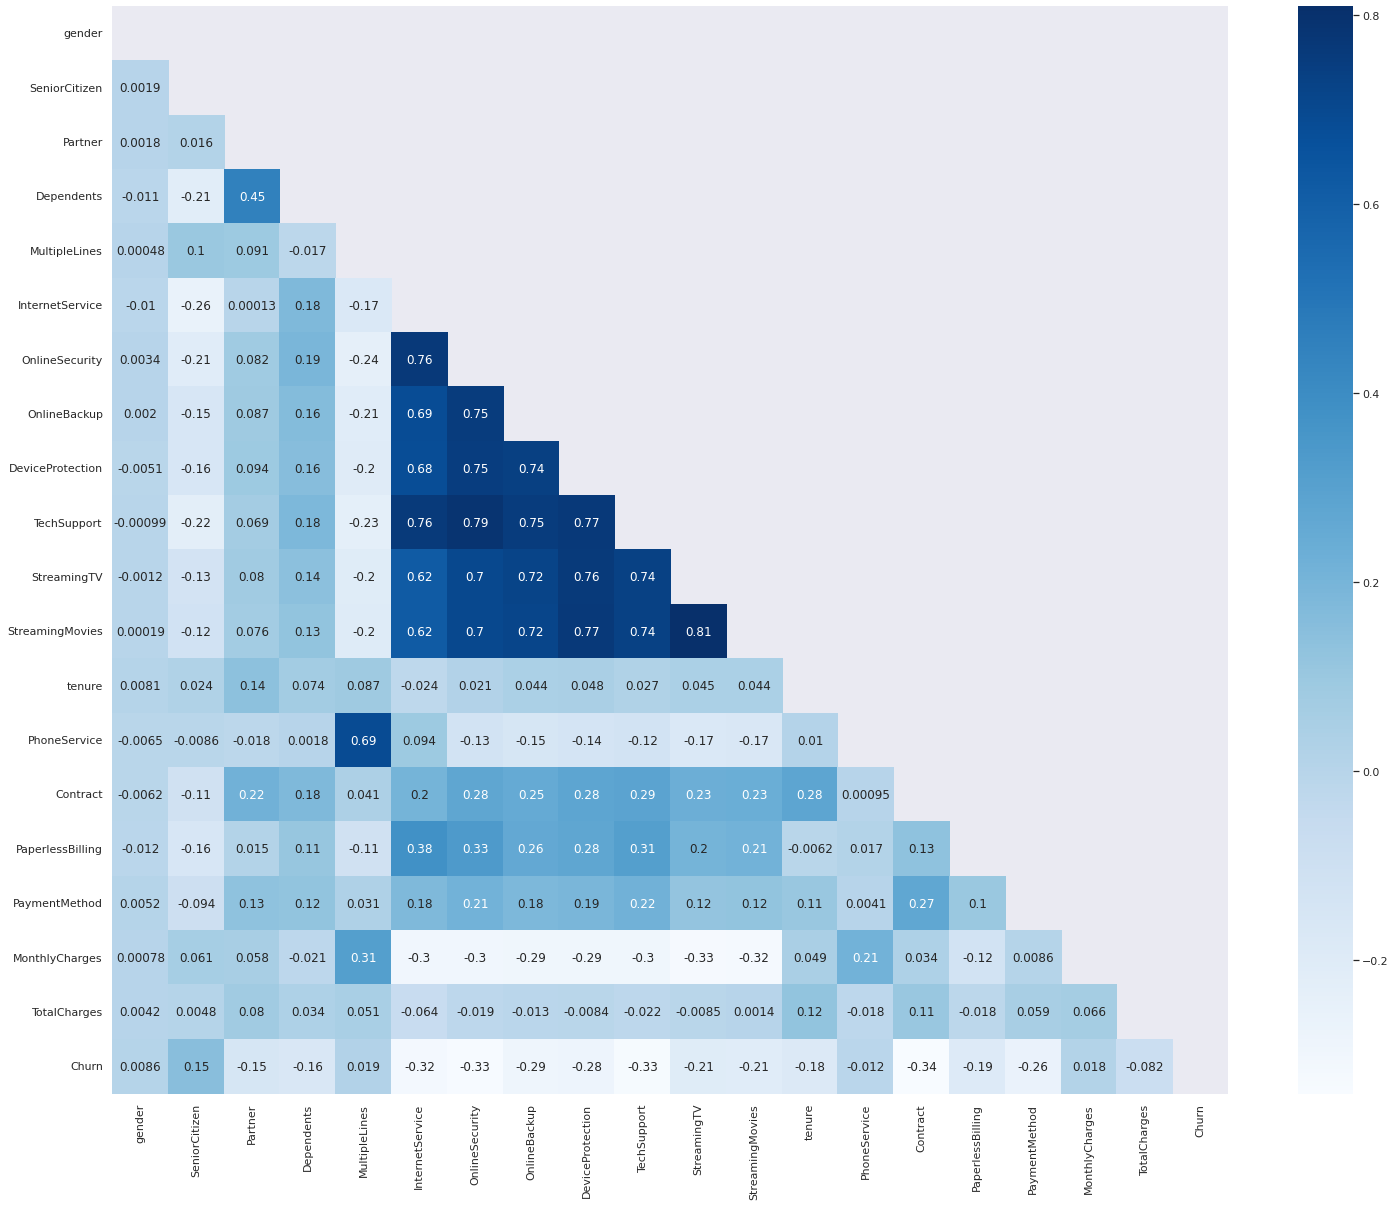

In [26]:
sns.set(rc={'figure.figsize':(25,20)})
mask=np.triu(np.ones_like(merged_data.corr()))
dataplot=sns.heatmap(merged_data.corr(),annot=True,mask=mask,cmap='Blues')
sns.set_style('white')
plt.show()

# Observation in Correlations :

* Target variable Churn has no strong relation with any of the features
* Target variable is maintaining correlation between the range -0.34 to 0.15
* It is maintaing weak negative correlation with features Contract (-0.34),OnlineSecurity (-0.33),TechSupport (-0.33),InternetService (-0.32),OnlineBackup (-0.29),DeviceProtection (-0.28),PaymentMethod (-0.26),StreamingTV (-0.21),StreamingMovies (-0.21),PaperlessBilling(-0.19),tenure (-0.18),Dependents (-0.16)
* Customers who has less contract duration (month-to-month) are the main cause of Churn
* As I mentioned earlier, the customers without OnlineSecurity,OnlineBackup,TechSupport,DeviceProtection,StreamingTV,StreamingMovies,Dependents,Partners,PaperlessBilling are looking for another service.So,the correlation values of these features are negatively impacting the target variable Churn
* Customers who have less tenure are affecting the churn problem
* churn variable is also maintaining some weak positive correlation with SeniorCitizen (0.15) which means senior people also have some contribution in causing churn problem


#  Removing features which has very weak correlations with target variable(between -0.1 & 0.1)

In [27]:
for i,j in zip(corr['Churn'],corr.index):
  if i>-0.1 and i<0.1:
    merged_data.drop(j,axis=1,inplace=True)


In [28]:
merged_data

,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,Churn
0,2,1,2,2,3,2,3,3,3,3,73,3,2,4,2
1,2,2,2,2,2,3,2,3,3,3,14,1,1,3,2
2,2,2,2,2,2,2,3,3,3,3,71,3,2,3,1
3,2,2,2,2,2,3,2,2,3,3,8,1,1,2,2
4,2,2,2,3,3,3,3,3,3,3,71,3,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,1,1,2,2,3,2,2,2,2,52,1,2,3,2
7039,2,1,1,3,3,2,2,3,2,2,72,1,2,1,2
7040,2,1,1,2,2,3,3,3,3,3,57,3,2,4,2
7041,1,1,2,3,3,3,3,3,3,3,69,3,2,3,1


# Splitting into train & test data

In [29]:
x,y=merged_data.drop(['Churn'],axis=1),merged_data.Churn
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)

In [30]:
x_train

,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod
2920,2,1,2,2,2,2,2,2,2,2,72,2,1,3
2966,1,2,2,2,3,3,3,3,2,2,39,3,2,4
6099,2,1,1,1,1,1,1,1,1,1,68,2,1,2
5482,2,1,1,2,3,3,2,2,2,2,13,1,2,3
2012,2,1,2,3,2,2,2,3,2,3,24,3,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,2,1,2,3,3,3,2,2,2,2,56,3,2,4
3264,2,2,1,3,3,3,2,2,2,3,61,3,2,4
1653,2,1,2,1,1,1,1,1,1,1,21,2,1,3
2607,1,2,2,3,3,3,3,3,3,3,73,3,2,4


In [31]:
x_test

,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod
2200,2,2,2,2,3,2,3,3,2,3,35,1,1,4
4627,2,2,2,3,2,2,2,2,2,2,37,1,2,1
3225,2,2,2,2,2,3,3,3,2,2,59,3,2,4
2828,2,2,2,1,1,1,1,1,1,1,73,2,1,3
3768,2,1,2,3,3,2,3,3,3,3,12,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2631,1,1,2,3,3,3,2,3,2,2,66,3,2,4
5333,2,1,1,3,3,3,3,3,2,2,59,3,1,4
6972,1,2,2,3,3,2,2,2,2,2,44,1,2,4
4598,2,2,2,2,2,3,3,3,3,3,54,3,1,3


# Feature Scaling by StandardScaler Method

In [32]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [33]:
x_train

array([[ 0.4397627 , -1.03247596,  0.65321536, ..., -0.42584736,
        -1.21465857,  0.26861146],
       [-2.27395367,  0.96854556,  0.65321536, ...,  0.81856343,
         0.82327662,  1.14237412],
       [ 0.4397627 , -1.03247596, -1.53088869, ..., -0.42584736,
        -1.21465857, -0.60515121],
       ...,
       [ 0.4397627 , -1.03247596,  0.65321536, ..., -0.42584736,
        -1.21465857,  0.26861146],
       [-2.27395367,  0.96854556,  0.65321536, ...,  0.81856343,
         0.82327662,  1.14237412],
       [ 0.4397627 ,  0.96854556, -1.53088869, ...,  0.81856343,
        -1.21465857, -1.47891388]])

In [34]:
x_test

array([[ 0.44053127,  0.95896743,  0.65719903, ..., -1.68099942,
        -1.16794433,  1.15701389],
       [ 0.44053127,  0.95896743,  0.65719903, ..., -1.68099942,
         0.85620519, -1.41703753],
       [ 0.44053127,  0.95896743,  0.65719903, ...,  0.83469701,
         0.85620519,  1.15701389],
       ...,
       [-2.26998644,  0.95896743,  0.65719903, ..., -1.68099942,
         0.85620519,  1.15701389],
       [ 0.44053127,  0.95896743,  0.65719903, ...,  0.83469701,
        -1.16794433,  0.29899675],
       [ 0.44053127,  0.95896743,  0.65719903, ...,  0.83469701,
         0.85620519,  0.29899675]])

In [35]:
model=LogisticRegression()
cr_model=model.fit(x_train,y_train)

# Predicting with test data

In [36]:
y_pred=cr_model.predict(x_test)

# Confusion Matrix

In [37]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[184, 184],
       [111, 930]])

# Accuracy

In [38]:
acc=(cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])*100
print('accuracy = '+str(round(acc))+'%')

accuracy = 79%


# Model performs with the accuracy of 79%

# Conclusion : 

* The main reason for Churn is that the customers are expecting quality because majority of churn customers are without Online security,Tech Support,Device protection,Online Backup.If discount or free service is provided to above features,then there is the chance of retaining the customers

* And also there is need to increase the subscriptions for TVStreaming and StreamingMovies.So,Both combined **TVStreaming+StreamingMovies Combo pack** should be provided as an offer instead of providing them separately.So,customers can satisfy by purchasing both in reasonable price which minimises the churn.